<a href="https://colab.research.google.com/github/ShivamSinghal1/My-ML-Projects/blob/master/MNIST_handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import utils
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten 
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

NameError: ignored

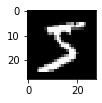

In [70]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [71]:
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [72]:
print(np.unique(Y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [73]:
n_classes = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [90]:
model = Sequential()
model.add(Dense(80, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 80)                62800     
_________________________________________________________________
activation_24 (Activation)   (None, 80)                0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                810       
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [92]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, shuffle = True,
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.5143 - acc: 0.8548 - val_loss: 0.2414 - val_acc: 0.9330
Epoch 2/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.2593 - acc: 0.9258 - val_loss: 0.1820 - val_acc: 0.9490
Epoch 3/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2053 - acc: 0.9399 - val_loss: 0.1566 - val_acc: 0.9548
Epoch 4/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.1746 - acc: 0.9490 - val_loss: 0.1339 - val_acc: 0.9605
Epoch 5/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.1521 - acc: 0.9558 - val_loss: 0.1231 - val_acc: 0.9639
Epoch 6/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.1351 - acc: 0.9600 - val_loss: 0.1131 - val_acc: 0.9657
Epoch 7/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.1201 - acc: 0.9642 - val_loss: 0.1068 - val_acc

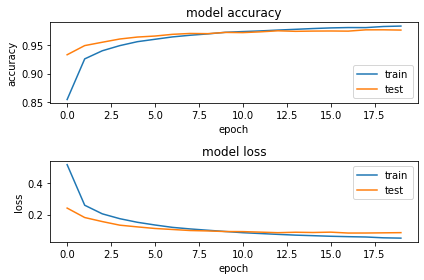

In [93]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [94]:
print(history.params)

{'batch_size': 128, 'epochs': 20, 'steps': None, 'samples': 48000, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}


In [95]:
loss_and_metrics = model.evaluate(X_test, Y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

10000/10000 [==============================] - 0s 24us/step
Test Loss 0.08155111578051001
Test Accuracy 0.9774


CNN Model

In [50]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [51]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               204928    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size= 128,
                    epochs= 20,
                    validation_split = 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 36s 753us/step - loss: 1.3475 - acc: 0.8419 - val_loss: 0.0817 - val_acc: 0.9756
Epoch 2/20
48000/48000 [==============================] - 35s 739us/step - loss: 0.1326 - acc: 0.9625 - val_loss: 0.0614 - val_acc: 0.9827
Epoch 3/20
48000/48000 [==============================] - 35s 738us/step - loss: 0.0983 - acc: 0.9719 - val_loss: 0.0583 - val_acc: 0.9843
Epoch 4/20
48000/48000 [==============================] - 36s 740us/step - loss: 0.0793 - acc: 0.9764 - val_loss: 0.0639 - val_acc: 0.9822
Epoch 5/20
48000/48000 [==============================] - 35s 733us/step - loss: 0.0645 - acc: 0.9806 - val_loss: 0.0522 - val_acc: 0.9863
Epoch 6/20
48000/48000 [==============================] - 35s 736us/step - loss: 0.0516 - acc: 0.9846 - val_loss: 0.0479 - val_acc: 0.9882
Epoch 7/20
48000/48000 [==============================] - 35s 738us/step - loss: 0.0491 - acc: 0.9853 - val_loss: 0.

In [53]:
loss_and_metrics = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 3s 280us/step


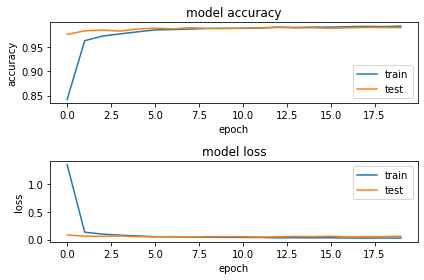

In [54]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [55]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.04276533186764595
Test Accuracy 0.989
